In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import agent
import analyse
import visualise
import vortices
from scipy.integrate import solve_ivp
from scipy.integrate import dblquad

In [3]:
def distance(states):
    left = states[0].T[1:3]
    right= states[1].T[1:3]
    dist =[]
    dist_x = []
    dist_y = []
    dist[:] = np.sqrt((left[:][0]-right[:][0])**2+(left[:][1]-right[:][1])**2)
    dist_y[:] = (left[:][0]-right[:][0])
    dist_x[:] = (left[:][1]-right[:][1])
    return dist,dist_x,dist_y

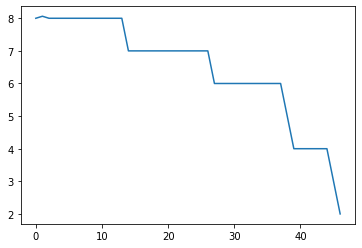

In [58]:
states_0 = pickle.load(open('data/states/states_temp_noise_p_0_0.1_0.1_[16, 0].p', 'rb'))
dist = distance(states_0)
plt.plot(dist)

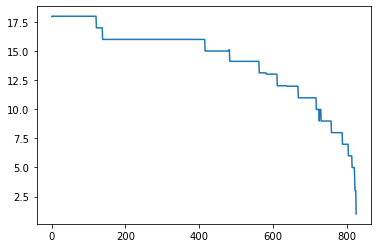

Model set


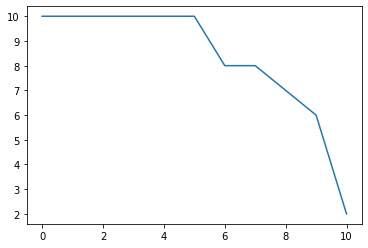

In [62]:
model = agent.set_model('temporal/100000/data_temp_noise_p_0_0_0_[15, 0]')
states_1 = vortices.states(model,99,0,5).transpose((1,0,2))
dist_1 = distance(states_1)
plt.plot(dist_1)

Model set
13


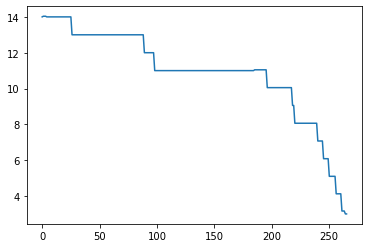

In [86]:
model = agent.set_model('vav_pairs/data_temp_noise_p_0_0.1_0.2_[13, 0]')
dists_0 = vortices.pair_distances(model)
plt.plot(dists_0)
plt.show()

In [113]:
model_0 = agent.set_model('vav_pairs/data_temp_noise_p_0_0_0.1_[16, 0]');
model_1 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.1_0.1_[16, 0]');
model_2 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.2_0.1_[16, 0]');
model_3 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.3_0.1_[16, 0]');
model_4 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.4_0.1_[16, 0]');
model_5 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.5_0.1_[16, 0]');
model_6 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.6_0.1_[16, 0]');
model_7 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.7_0.1_[16, 0]');
model_8 = agent.set_model('vav_pairs/data_temp_noise_p_0_0.8_0.1_[16, 0]');

dist_0 = vortices.pair_distances(model_0)[0];
dist_1 = vortices.pair_distances(model_1)[0];
dist_2 = vortices.pair_distances(model_2)[0];
dist_3 = vortices.pair_distances(model_3)[0];
dist_4 = vortices.pair_distances(model_4)[0];
dist_5 = vortices.pair_distances(model_5)[0];
dist_6 = vortices.pair_distances(model_6)[0];
dist_7 = vortices.pair_distances(model_7)[0];
dist_8 = vortices.pair_distances(model_8)[0];



Model set
Model set
Model set
Model set
Model set
Model set
Model set
Model set
Model set
16
16
16
17
16
17
17
15
17


No handles with labels found to put in legend.


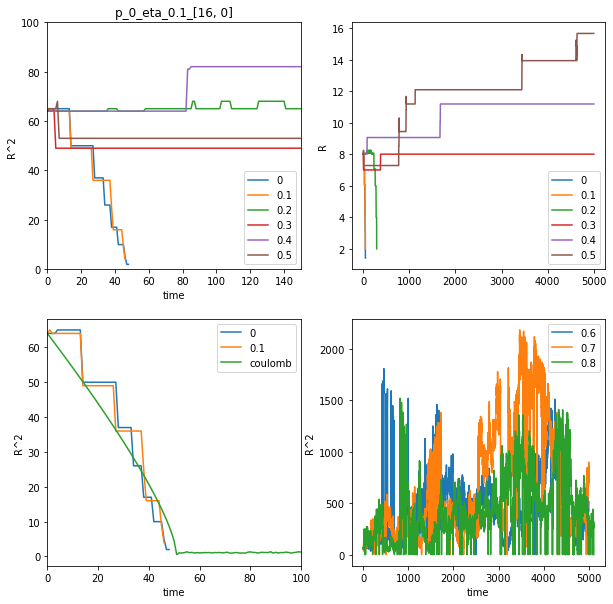

In [115]:
fig,axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(np.square(dist_0), label='0')
axs[0,0].plot(np.square(dist_1),label='0.1')
axs[0,0].plot(np.square(dist_2),label='0.2')
axs[0,0].plot(np.square(dist_3), label='0.3')
axs[0,0].plot(np.square(dist_4),label='0.4')
axs[0,0].plot(np.square(dist_5),label='0.5')
plt.legend()

axs[0,1].plot(dist_0, label='0')
axs[0,1].plot(dist_1,label='0.1')
axs[0,1].plot(dist_2,label='0.2')
axs[0,1].plot(dist_3, label='0.3')
axs[0,1].plot(dist_4,label='0.4')
axs[0,1].plot(dist_5,label='0.5')

axs[1,1].plot(np.square(dist_6),label='0.6')
axs[1,1].plot(np.square(dist_7),label='0.7')
axs[1,1].plot(np.square(dist_8),label='0.8')

axs[1,0].plot(np.square(dist_0), label='0')
axs[1,0].plot(np.square(dist_1),label='0.1')
axs[1,0].plot(np.square(sol.y[0]),label='coulomb')
#axs[1,0].plot(np.square(dist_2),label='0.2')

axs[0,0].set_xlabel('time')
axs[0,0].set_ylabel('R^2')
axs[0,0].set_xlabel('time')
axs[0,1].set_ylabel('R')
axs[1,0].set_xlabel('time')
axs[1,0].set_ylabel('R^2')
axs[1,1].set_xlabel('time')
axs[1,1].set_ylabel('R^2')

axs[0,0].set_xlim(0,150)
axs[0,0].set_ylim(0,100)
axs[1,0].set_xlim(0,100)

axs[0,0].set_title('p_0_eta_0.1_[16, 0]')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

#plt.xlim(0,1000)
#plt.ylim(0,1000)
plt.show()


In [109]:
def coulomb(t,r):
    A = -1
    output = A/(r*np.log(r))
    return output

sol = solve_ivp(coulomb,[0,300],[8],t_eval=range(300))

<ipython-input-109-364f87044727>:3: RuntimeWarning: invalid value encountered in log
  output = A/(r*np.log(r))


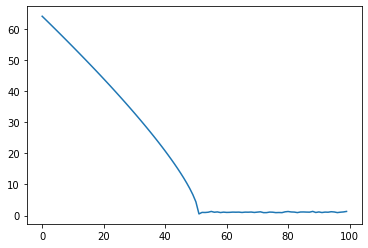

In [74]:
plt.plot(np.square(sol.y[0]))

In [4]:
model = agent.set_model('data300_2D41_B_0_0_[-1, 1]')

Model set


In [14]:
states_1 = vortices.states(model,299,0,5).transpose((1,0,2))

sites2copy 1
born 1
sites2copy 1
born 1


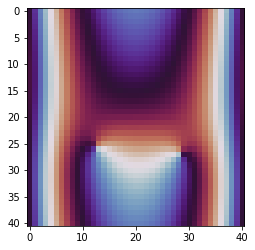

In [35]:
model.theta.T[100:200].reshape(100,41,41).transpose(1,2,0)[39,5] -= np.pi
plt.imshow(model.theta.T[100].reshape(41,41) %(2*np.pi),interpolation='none',cmap='twilight')


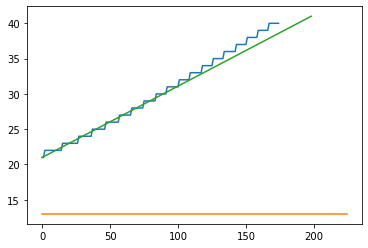

In [94]:
plt.plot(states_1[0].T[1:2][0][50:])
plt.plot(states_1[0].T[2:3][0])
xs= np.linspace(0,200,200-1)
plt.plot(21+0.1*xs)

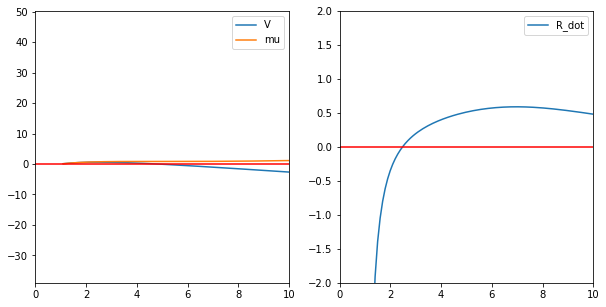

In [72]:
eta = 0.9
def V(r,a):
    return np.log(r) - a* np.log(r)**3

x = np.linspace(1.1, 100, 1000)
v = V(x,eta**2/2)
#fig,axs = plt.subplots(2)

def mobility(r,a):
    return np.log(r) -(2/3)*a*np.log(r)**3 + (1/5)*(a**2)*np.log(r)**5

def dVdr(r,a):
    return 1/r - 3*a*(np.log(r)**2)/r

mu = mobility(x,eta**2/2)

dvdr = dVdr(x,eta**2/2)

R_dot = - np.divide(dvdr,mu)
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(x,v,label='V')
axs[0].plot(x,mu,label='mu')
axs[0].axhline(0,color='r')
axs[0].legend()
axs[0].set_xlim(0,10)
axs[1].plot(x,R_dot,label='R_dot')
axs[1].set_ylim(-2,2)
axs[1].set_xlim(0,10)
axs[1].axhline(0,color='r')

axs[1].legend()
#sol = solve_bvp(ckpz_potential,[0,300],[8],t_eval=range(300))

<ipython-input-15-cf902e6cae82>:10: RuntimeWarning: invalid value encountered in log
  return np.log(r) -(2/3)*a*np.log(r)**3 + (1/5)*(a**2)*np.log(r)**5
<ipython-input-15-cf902e6cae82>:13: RuntimeWarning: invalid value encountered in log
  return 1/r - 3*a*(np.log(r)**2)/r


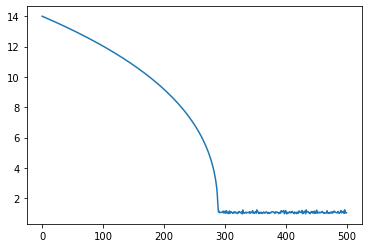

In [29]:
eta = 0.2
def Rdot(t,r,a):
    #V = V(r)
    mu = mobility(r,a)
    dvdr = dVdr(r,a)
    R_dot = - np.divide(dvdr,mu)
    return R_dot

sol = solve_ivp(Rdot,[0,500],[14],t_eval=range(500),args=[eta**2/2])
plt.plot(sol.y[0])

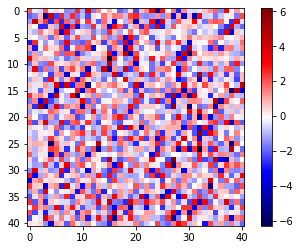

In [90]:
sigma=0.5
N = 41
Lambda = np.random.normal(0, sigma, [N, N])
def grad(field):
    v_x = field - np.roll(field, 1, axis=1)
    v_y = field - np.roll(field, 1, axis=0)
    return v_x,v_y


def curl_z(v_x,v_y):
    curl = v_y - np.roll(v_y, 1, axis=1) - (v_x - np.roll(v_x, 1, axis=0))
    return curl
    
def div(v_x,v_y):
    div = v_x - np.roll(v_x, 1, axis=1) + (v_y - np.roll(v_y, 1, axis=0))
    return div
    
    
def curl_xy(v_z): #field along z axis
    curl_x = (v_z - np.roll(v_z, 1, axis=0))
    curl_y = - (v_z - np.roll(v_z, 1, axis=1))
    return curl_x,curl_y

dLambda_x,dLambda_y = grad(Lambda)
divLambda = div(dLambda_x,dLambda_y)
curlLambda = curl_z(dLambda_x,dLambda_y)

plt.imshow(divLambda,interpolation='none',cmap='seismic')
plt.colorbar()

In [104]:
def div_function(x_,y_,x,y):
    dist_x  = abs(x-x_)
    if dist_x > N/2:
        dist_x = N - dist_x
    dist_y = abs(y-y_)
    if dist_y > N/2:
        dist_y = N - dist_y
    dist = np.sqrt(dist_x**2 + dist_y**2)
    if dist == 0:
        put = 1
    else:
        put = dist
    return divLambda[int(x_),int(y_)]*np.log(put)

x_ = np.linspace(0, N-1, N)
y_ = np.linspace(0, N-1, N)
def div_integral(x,y):
    tot = 0
    for i in x_:
        for j in y_:
            tot += div_function(i,j,x,y)/(2*np.pi)
    return tot


x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
Omega = np.zeros([N,N])
#print(integral(12,14))
for i in x:
    for j in y:
        Omega[int(i),int(j)] = div_integral(i,j)
#sol[:,:] = integral(x[:],y[:])




In [105]:
def curl_function(x_,y_,x,y):
    dist_x  = abs(x-x_)
    if dist_x > N/2:
        dist_x = N - dist_x
    dist_y = abs(y-y_)
    if dist_y > N/2:
        dist_y = N - dist_y
    dist = np.sqrt(dist_x**2 + dist_y**2)
    if dist == 0:
        put = 1
    else:
        put = dist
    return curlLambda[int(x_),int(y_)]*np.log(put)

x_ = np.linspace(0, N-1, N)
y_ = np.linspace(0, N-1, N)
def curl_integral(x,y):
    tot = 0
    for i in x_:
        for j in y_:
            tot += curl_function(i,j,x,y)/(2*np.pi)
    return tot


x = np.linspace(0, N-1, N)
y = np.linspace(0, N-1, N)
F = np.zeros([N,N])
#print(integral(12,14))
for i in x:
    for j in y:
        F[int(i),int(j)] = curl_integral(i,j)
#sol[:,:] = integral(x[:],y[:])


In [106]:
dOmega_x,dOmega_y = grad(Omega)
lapOmega = div(dOmega_x,dOmega_y)
curlgradOmega= curl_z(dOmega_x,dOmega_y)

curlF_x,curlF_y = curl_xy(F)
divcurlF = div(curlF_x,curlF_y)
curlcurlF = curl_z(curlF_x,curlF_y)

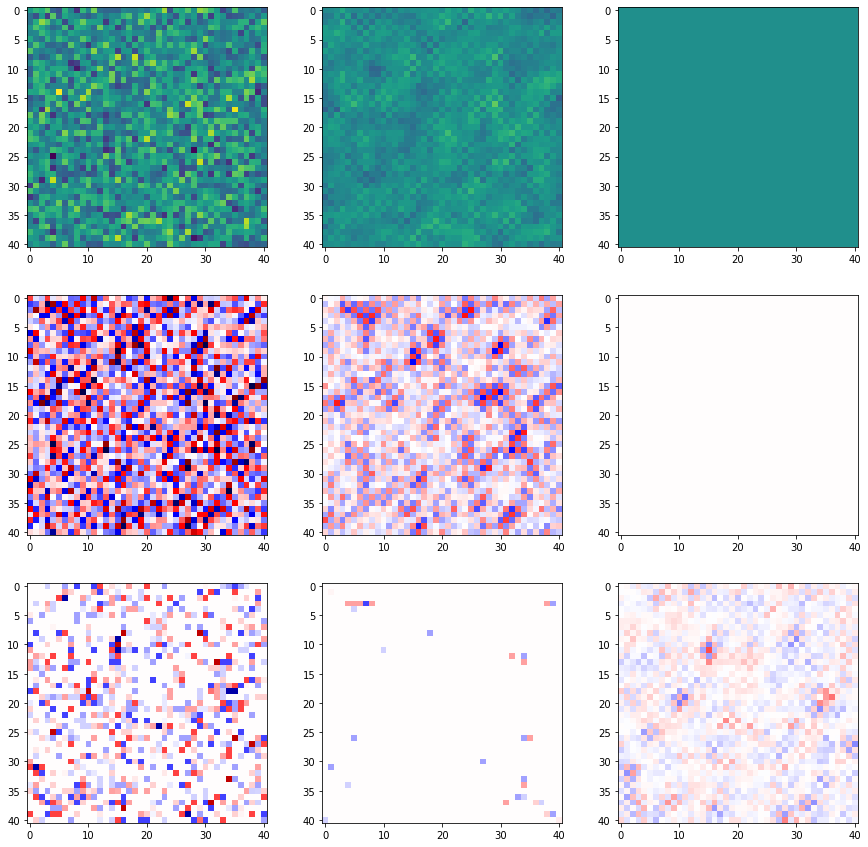

In [110]:
fig,axs = plt.subplots(3,3,figsize=(15,15))
freqmin = 1.6
curlmax = 0.0000000000000006
divmax = 5
im1 = axs[0,0].imshow(Lambda,interpolation='none',vmin=-freqmin,vmax=freqmin)
#plt.colorbar(im1,orientation='horizontal')
im2 = axs[0,1].imshow(Omega,interpolation='none',vmin=-freqmin,vmax=freqmin)

im3 = axs[0,2].imshow(F,interpolation='none',vmin=-freqmin,vmax=freqmin)


im4 = axs[1,0].imshow(divLambda,cmap='seismic',interpolation='none',vmin=-divmax,vmax=divmax)
#plt.colorbar(im4,orientation = 'horizontal')

im5 = axs[1,1].imshow(lapOmega,cmap='seismic',interpolation='none',vmin=-divmax,vmax=divmax)


im6 = axs[1,2].imshow(divcurlF,cmap='seismic',interpolation='none',vmin=-divmax,vmax=divmax)

im7 = axs[2,0].imshow(curlLambda,cmap='seismic',interpolation='none',vmin=-curlmax,vmax=curlmax)
#plt.colorbar(im7,orientation = 'horizontal')

im8 = axs[2,1].imshow(curlgradOmega,cmap='seismic',interpolation='none',vmin=-curlmax,vmax=curlmax)


im9 = axs[2,2].imshow(curlcurlF,cmap='seismic',interpolation='none',vmin=-curlmax,vmax=curlmax)



In [162]:
np.std(Omega)

0.20662276093368395

In [13]:
#curl = v_y - np.roll(v_y, 1, axis=1) - (v_x - np.roll(v_x, 1, axis=0))

In [136]:
np.mean(np.divide(Lambda,Omega))

-5.4622915776734215

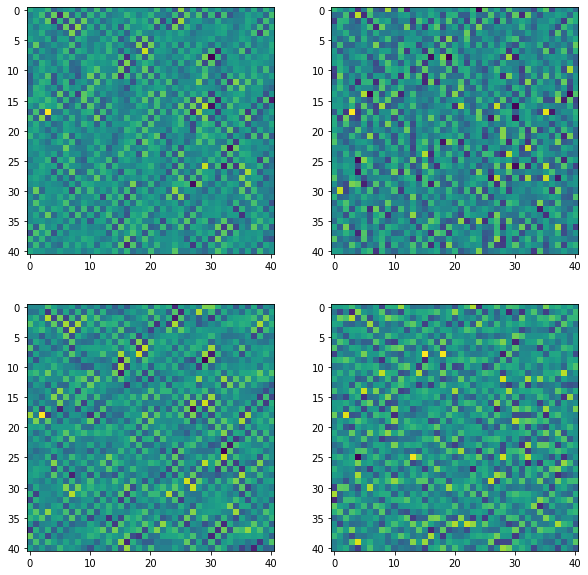

In [178]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
a = 2.5*(curlF_x +dOmega_x)
b = 2.5*(curlF_y + dOmega_y)
im0 = axs[0,0].imshow(a,interpolation='none')
im0_1 = axs[0,1].imshow(dLambda_x,interpolation='none')
im1 = axs[1,0].imshow(b,interpolation='none')
im1_1= axs[1,1].imshow(dLambda_y,interpolation='none')
#plt.colorbar(im1_1)
#plt.colorbar(im0_1)

In [186]:
np.std(dLambda_y-b)

0.606982644740271

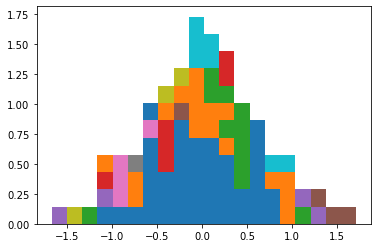

In [206]:
plt.hist(Lambda,bins=20,density=True,histtype='stepfilled');

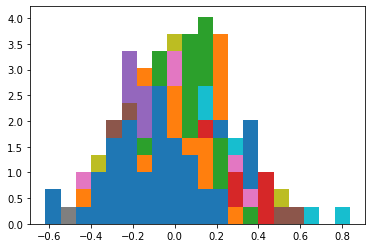

In [207]:
plt.hist(Omega,bins=20,density=True,histtype='stepfilled');

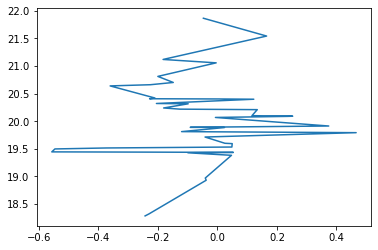

In [226]:
val = 10
y=range(len(Omega[val]))
#plt.plot(Omega.T[val]-Omega[0,val])
x= Omega[val]


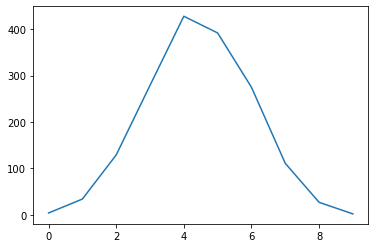

In [212]:
plt.plot(np.histogram(Lambda)[0])

In [95]:
model = agent.set_model('data300_2D41_p_0_0.2_[16, 0]')

Model set


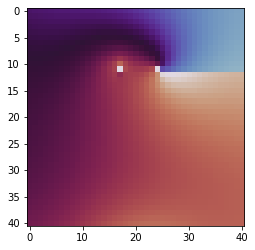

In [116]:
removed = model.make_topo_defect(-1, 41, 41, 17, 11)+model.theta.T[250].reshape(41,41)%(2*np.pi)
plt.imshow(removed,cmap='twilight')


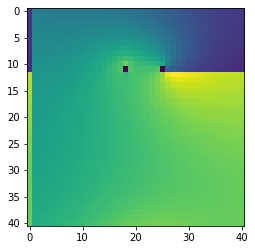

In [130]:
#plt.imshow(np.roll(removed,1,axis=0))
plt.imshow(np.roll(removed,1,axis=1))


In [98]:
states = vortices.states(model,299,0,5)

In [ ]:
model.theta.T[250].reshape(41,41)%(2*np.pi)

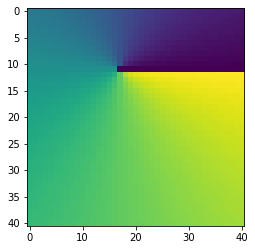